In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.integrate import solve_ivp
import math
from mpl_toolkits.mplot3d import Axes3D

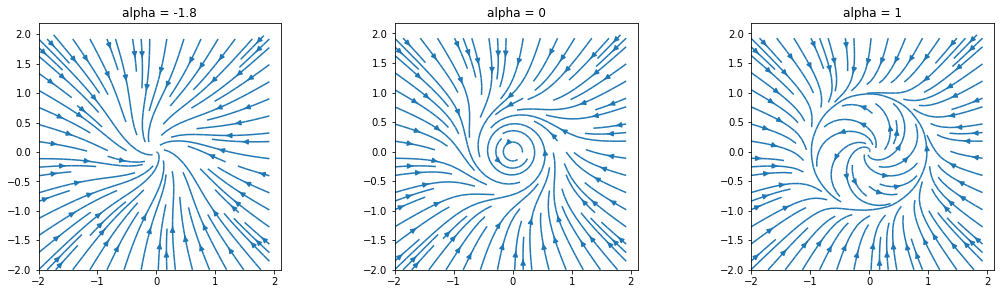

In [7]:
#task3 1
w = 2
Y, X = np.mgrid[-w:w:20j, -w:w:20j]
alpha = 0
x_0 = np.sqrt(alpha)
start = [[2,0]]


fig = plt.figure(figsize=(15, 15))
gs = gridspec.GridSpec(nrows=3, ncols=3, height_ratios=[1, 1, 2])
alpha =0

#  X_dot initial 
U = alpha*X-Y-X*(X*X+Y*Y)*(X*X+Y*Y) 
V = X+alpha*Y-Y*(X*X+Y*Y)*(X*X+Y*Y)
ax0 = fig.add_subplot(gs[0, 1])
ax0.streamplot(X, Y, U, V)
ax0.set_title('alpha = 0')
ax0.set_aspect('equal', 'box') 

#  X_dot second
alpha =-1.8
U = alpha*X-Y-X*(X*X+Y*Y)*(X*X+Y*Y) 
V = X+alpha*Y-Y*(X*X+Y*Y)*(X*X+Y*Y)
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_aspect('equal', 'box') 
ax1.streamplot(X, Y, U, V)
ax1.set_title('alpha = -1.8')

alpha =1

U = alpha*X-Y-X*(X*X+Y*Y)*(X*X+Y*Y) 
V = X+alpha*Y-Y*(X*X+Y*Y)*(X*X+Y*Y)
#  X_dot initial 
ax0 = fig.add_subplot(gs[0, 2])
ax0.set_aspect('equal', 'box') 
ax0.streamplot(X, Y, U, V)
ax0.set_title('alpha = 1')

#  X_dot second
'''
alpha = 2
U = alpha*X-Y-X*(X*X+Y*Y)*(X*X+Y*Y) 
V = X+alpha*Y-X*(X*X+Y*Y)*(X*X+Y*Y)
ax1 = fig.add_subplot(gs[1, 1])
ax1.streamplot(X, Y, U, V)
ax1.set_title('alpha = 0.5')
'''

plt.tight_layout()
plt.show()


In [8]:
def solve_2D(name="int.png",start=[], max_time=4.0):
    fig, ax = plt.subplots()
    
    N = len(start)

    colors = plt.cm.viridis(np.linspace(0, 1, N))
    
    def fx(t, x_y):
        """Compute the time-derivative of a system."""
        x, y = x_y
        return [x-y-x*((x**2 +y)**2), x+y-(y*(x**2+y)**2)]
    
    
    # Solve for the trajectories
    t = np.linspace(0, max_time, 1000)
    x_t = np.asarray([solve_ivp(fun=fx, t_span=[0, 1000], y0=val, t_eval=t) for val in start])

    for i in range(N):
        x = x_t[i].y[0, :]
        y = x_t[i].y[1, :]
        lines = ax.plot(x, y, '-', color=colors[i])
        plt.setp(lines, linewidth=2)

    title = r'$x0 = {0}$'.format(start)
    plt.title(title)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    plt.savefig(name, format="png")
    plt.show()
    return t, x_t

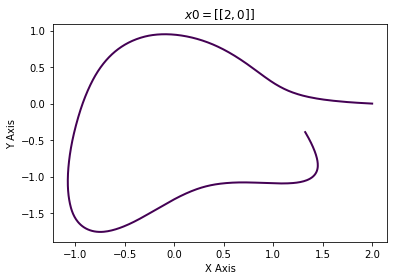

In [9]:
t, x_t = solve_2D(name="task3_orbit_eq1.png",start=[[2,0]], max_time=6.0)

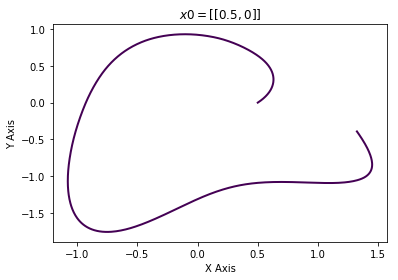

In [10]:
t, x_t = solve_2D(name="task3_orbit_eq2.png",start=[[0.5,0]], max_time=6.0)

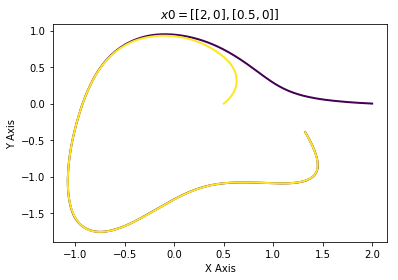

In [11]:
t, x_t = solve_2D(name="task3_orbit_both.png",start=[[2,0], [0.5,0]], max_time=6.0)

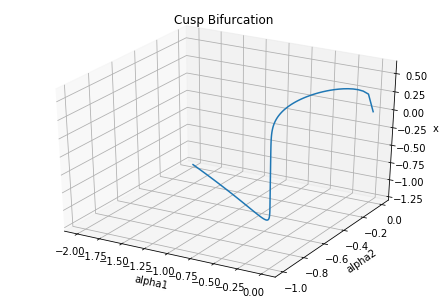

In [14]:
alpha1=np.linspace(-1,1,100)
alpha2=np.linspace(-1,1,100)
x=np.linspace(-1,1,100)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
#ax.axis('off')
alpha_1 = x*x*x - alpha2 * x
alpha_2 = (x*x*x-alpha1)/x
x = np.cbrt(alpha1-(alpha2*x))
ax .plot(alpha_1,alpha_2,x)

    #ax.view_init(30, angle)
#title = r'$x0 = {0}, \sigma={1}, \beta = {2}, \rho = {3}$'.format(x0[0], sigma,round(beta,2),rho)
plt.title('Cusp Bifurcation')
ax.set_xlabel("alpha1")
ax.set_ylabel("alpha2")
ax.set_zlabel("x")
plt.savefig('task3_cusp', format="png")
plt.show()